# **Grade prediction**

Dataset:

1 id - student's id

2 sex - student's sex (binary: "F" - female or "M" - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: "U" - urban or "R" - rural)

5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

12 guardian - student's guardian (nominal: "mother", "father" or "other")

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

31 G1 - first period grade (numeric: from 0 to 20)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as metric
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [38]:
df = pd.read_csv("/content/train.csv", sep=';')
df.head(n=10)

,id,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,1,F,16,U,GT3,T,4,4,services,services,...,yes,no,3,2,3,1,2,2,6,13
1,2,M,15,U,GT3,T,2,2,other,other,...,yes,no,4,2,2,1,2,5,2,12
2,3,F,16,U,GT3,T,4,3,teacher,health,...,yes,no,3,4,4,2,4,4,2,10
3,4,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,6
4,5,M,15,U,GT3,T,3,4,other,other,...,yes,no,3,4,3,1,2,4,6,14
5,6,M,17,U,LE3,T,2,3,services,services,...,yes,no,5,3,3,1,3,3,2,12
6,7,M,15,U,GT3,T,2,3,other,other,...,yes,no,5,3,2,1,2,5,4,11
7,8,F,18,U,LE3,T,2,2,other,other,...,yes,yes,4,3,3,1,1,2,0,8
8,9,M,15,U,LE3,T,1,2,other,at_home,...,yes,no,4,3,2,1,1,5,2,9
9,10,F,17,U,GT3,T,3,1,services,services,...,yes,no,3,4,3,2,3,5,1,12


# **EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          309 non-null    int64 
 1   sex         309 non-null    object
 2   age         309 non-null    int64 
 3   address     309 non-null    object
 4   famsize     309 non-null    object
 5   Pstatus     309 non-null    object
 6   Medu        309 non-null    int64 
 7   Fedu        309 non-null    int64 
 8   Mjob        309 non-null    object
 9   Fjob        309 non-null    object
 10  reason      309 non-null    object
 11  guardian    309 non-null    object
 12  traveltime  309 non-null    int64 
 13  studytime   309 non-null    int64 
 14  failures    309 non-null    int64 
 15  schoolsup   309 non-null    object
 16  famsup      309 non-null    object
 17  paid        309 non-null    object
 18  activities  309 non-null    object
 19  nursery     309 non-null    object
 20  higher    

**Нам нужно будет предсказать оценки студентов. Посмотрим статистику по G1**

In [4]:
df['G1'].describe()

count    309.000000
mean      10.864078
std        3.252517
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

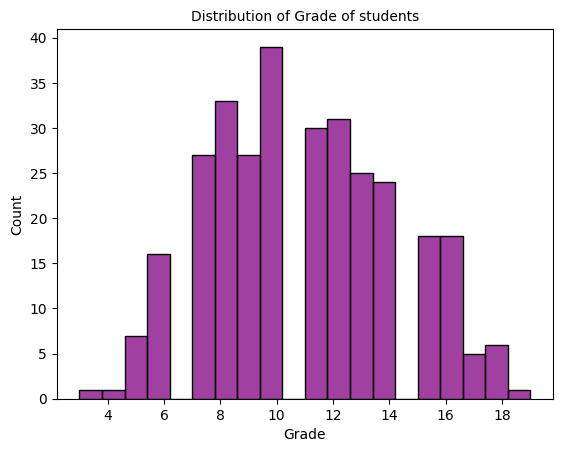

In [18]:
a = sns.histplot(df['G1'], bins = 20, color = 'purple')
a.axes.set_title('Distribution of Grade of students', fontsize = 10)
a.set_xlabel('Grade', fontsize = 10)
a.set_ylabel('Count', fontsize = 10)
plt.show()

In [20]:
# print the 'shape' of the matrix
print(f"Rows x columns: {df.shape}")

# Check the total number of NAs
print(f"Total NA values: {df.isna().sum().sum()}")

Rows x columns: (309, 31)
Total NA values: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:purple'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


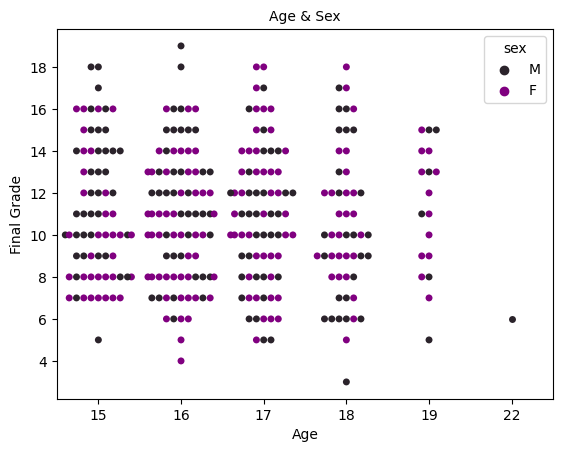

In [27]:
b = sns.swarmplot(x='age', y='G1',hue='sex', data=df, color = 'purple')
b.axes.set_title('Age & Sex', fontsize = 10)
b.set_xlabel('Age', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

In [28]:
# Get numeric columns only
numeric = list(df.select_dtypes(include=np.number).columns)

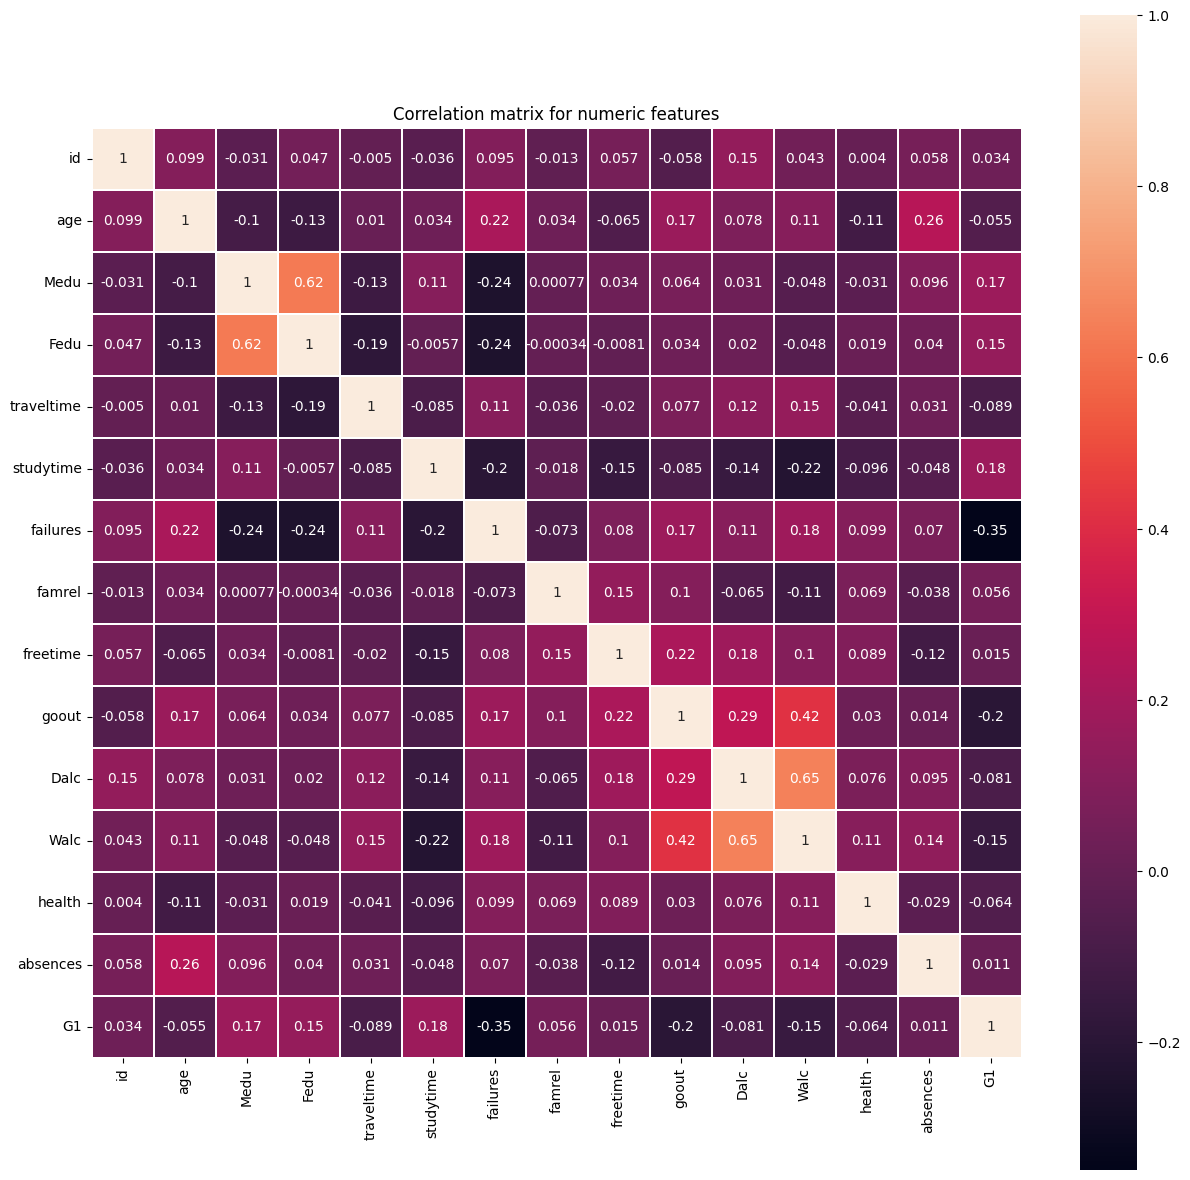

In [29]:
correlations = df[numeric].corr(method='pearson')

plt.figure(figsize=(15,15))
sns.heatmap(correlations, square=True, annot=True, linewidths=0.25)
plt.title("Correlation matrix for numeric features")
plt.show()

In [39]:
# Replace some columns with dummy variables
ddf = pd.get_dummies(df, columns=['sex'])
ddf = pd.get_dummies(ddf, columns=['address'])
ddf = pd.get_dummies(ddf, columns=['famsize'])
ddf = pd.get_dummies(ddf, columns=['Pstatus'])
ddf = pd.get_dummies(ddf, columns=['Mjob'])
ddf = pd.get_dummies(ddf, columns=['Fjob'])
ddf = pd.get_dummies(ddf, columns=['reason'])
ddf = pd.get_dummies(ddf, columns=['guardian'])
ddf = pd.get_dummies(ddf, columns=['schoolsup'])
ddf = pd.get_dummies(ddf, columns=['famsup'])
ddf = pd.get_dummies(ddf, columns=['paid'])
ddf = pd.get_dummies(ddf, columns=['activities'])
ddf = pd.get_dummies(ddf, columns=['nursery'])
ddf = pd.get_dummies(ddf, columns=['higher'])
ddf = pd.get_dummies(ddf, columns=['internet'])
ddf = pd.get_dummies(ddf, columns=['romantic'])

In [31]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 309 non-null    int64
 1   age                309 non-null    int64
 2   Medu               309 non-null    int64
 3   Fedu               309 non-null    int64
 4   traveltime         309 non-null    int64
 5   studytime          309 non-null    int64
 6   failures           309 non-null    int64
 7   famrel             309 non-null    int64
 8   freetime           309 non-null    int64
 9   goout              309 non-null    int64
 10  Dalc               309 non-null    int64
 11  Walc               309 non-null    int64
 12  health             309 non-null    int64
 13  absences           309 non-null    int64
 14  G1                 309 non-null    int64
 15  sex_F              309 non-null    uint8
 16  sex_M              309 non-null    uint8
 17  address_R       

После преобразования категориальных переменных мы можем убрать лишние, так как они обозначают по сути одно и то же.

In [40]:
ddf = ddf.drop(['schoolsup_no', 'famsup_no',  'paid_no', 'activities_no',
               'nursery_no', 'higher_no', 'internet_no', 'romantic_no',
               'Walc', 'Medu', 'sex_F', 'address_R', 'famsize_GT3', 'Pstatus_A', 'guardian_father'],
               axis='columns')

# **1. Use the data from the train.csv file. Split the data into training (85%) and validation (15%) parts.**

In [41]:
Y = ddf.pop("G1")
Y = Y.values
X = ddf.values

print("Before:")
print(f"\tX: {X.shape}; Y: {Y.shape}")

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.15, random_state = 42
)

print("Train:")
print(f"\tX: {X_train.shape}; Y: {Y_train.shape}")
print("Test:")
print(f"\tX: {X_test.shape}; Y: {Y_test.shape}")

Before:
	X: (309, 40); Y: (309,)
Train:
	X: (262, 40); Y: (262,)
Test:
	X: (47, 40); Y: (47,)


#**2. Based on the data, build a linear regression model (you may use regularization).**

In [8]:
# Lasso - l1 norm
# Ridge - l2 norm
# Elastic Net - l1 and l2 norm

alpha = 0.1
models = {
    'LinearRegression': LinearRegression().fit(X_train, Y_train),
    "Lasso": Lasso(alpha=alpha).fit(X_train, Y_train),
    "Ridge": Ridge(alpha=alpha * 1_000).fit(X_train, Y_train),
    "Elastic Net": ElasticNet(alpha=alpha).fit(X_train, Y_train)
}

# Train and print metrics
for name, X, Y in ("train", X_train, Y_train), ("test", X_test, Y_test):
  print(name)
  for mtype, model in models.items():
    mae = mean_absolute_error(Y, model.predict(X))
    print(f"\t{mtype}: {mae:.3f}")

train
	LinearRegression: 2.193
	Lasso: 2.330
	Ridge: 2.382
	Elastic Net: 2.280
test
	LinearRegression: 1.994
	Lasso: 2.147
	Ridge: 2.135
	Elastic Net: 2.090


# **3. Based on the data, build a RandomForest model with different options for parameters.**

In [11]:
forest = RandomForestRegressor(n_estimators=10)
rForest = forest.fit(X_train, Y_train).predict(X_test)

print(f"'Naive random forest'-> {metric(Y_test, rForest)}")

'Naive random forest'-> 2.0170212765957443


Подберем параметры с помощью GridSearch

In [12]:
grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 30, None],
    'min_samples_leaf': [1, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [5, 10, 20, 60, 70, 100]
}

grid = GridSearchCV(
    RandomForestRegressor(), grid
)

In [13]:
predY = grid.fit(X_train, Y_train).predict(X_test)

print(f"'Optimized Random Forest' -> {metric(Y_test, predY)}")
print(f"\t{grid.best_params_}")

'Optimized Random Forest' -> 2.027247983506253
	{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 70}


In [14]:
optRForest = RandomForestRegressor(bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70)

y_pred_optRForest = optRForest.fit(X_train, Y_train).predict(X_test)
mae_optRForest = metric(Y_test, y_pred_optRForest)
r2_score_optRForest = r2_score(Y_test, y_pred_optRForest)
print(optRForest)
print("MAE on test data : %f" % mae_optRForest)
print("r^2 on test data : %f" % r2_score_optRForest)

RandomForestRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=70)
MAE on test data : 2.087816
r^2 on test data : 0.129792


# **4. Select the best set of parameters based on cross-validation.**

In [17]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

In [28]:
#Initialize the stratified subsets of our dataset for validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize our classifier with default parameters
rfc = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True)

# Train on the training dataset
results = cross_val_score(rfc, X, Y, cv=skf)

# Evaluate the accuracy on the test dataset
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CV accuracy score: 15.95%


In [30]:
# Initialize validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create lists to maintain accuracy on the training and test dataset
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100, 300, 500]

# Train on the training dataset
for ntrees in trees_grid:
    rfc = RandomForestRegressor(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100,
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to c

Best accuracy on CV is 16.20% with 50 trees


In [31]:
# Create lists to maintain accuracy on the training and test dataset
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24, 30, 40]

# Train on the training dataset
for max_depth in max_depth_grid:
    rfc = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100,
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Best accuracy on CV is 17.07% with 7 max_depth


In [32]:
# Create lists to maintain accuracy on the training and test dataset
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Train on the training dataset
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1,
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100,
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Best accuracy on CV is 18.10% with 11 min_samples_leaf


In [33]:
# Create lists to maintain accuracy on the training and test dataset
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

# Train on the training dataset
for max_features in max_features_grid:
    rfc = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1,
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100,
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Best accuracy on CV is 17.55% with 12 max_features


In [34]:
parameters = {'max_features': [5, 6, 7, 10, 12, 13, 15, 16, 20, 30], 'min_samples_leaf': [1, 3, 5, 7, 11, 13], 'max_depth': [5, 7, 10, 11, 15, 20, 30]}
rfc = RandomForestRegressor(n_estimators=50, random_state=42,
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, Y)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(n_estimators=50, n_jobs=-1,
                                             oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 11, 15, 20, 30],
                         'max_features': [5, 6, 7, 10, 12, 13, 15, 16, 20, 30],
                         'min_samples_leaf': [1, 3, 5, 7, 11, 13]},
             verbose=1)

In [35]:
gcv.best_estimator_, gcv.best_score_

(RandomForestRegressor(max_depth=10, max_features=10, min_samples_leaf=3,
                       n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42),
 0.18482767822322896)

In [42]:
optRForest2 = RandomForestRegressor(max_depth=10, min_samples_leaf=3,
                                   n_estimators=50, max_features=10, n_jobs=-1, oob_score=True, random_state=42)

y_pred_optRForest2 = optRForest2.fit(X_train, Y_train).predict(X_test)
mae_optRForest2 = metric(Y_test, y_pred_optRForest2)
r2_score_optRForest2 = r2_score(Y_test, y_pred_optRForest2)
print(optRForest2)
print("MAE on test data : %f" % mae_optRForest2)
print("r^2 on test data : %f" % r2_score_optRForest2)

RandomForestRegressor(max_depth=10, max_features=10, min_samples_leaf=3,
                      n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=42)
MAE on test data : 2.010772
r^2 on test data : 0.197193


In [43]:
optRForest2 = RandomForestRegressor(bootstrap=True, max_depth=15, min_samples_leaf=1,
                                   n_estimators=50, max_features=30, n_jobs=-1, oob_score=True, random_state=42)

y_pred_optRForest2 = optRForest2.fit(X_train, Y_train).predict(X_test)
mae_optRForest2 = metric(Y_test, y_pred_optRForest2)
r2_score_optRForest2 = r2_score(Y_test, y_pred_optRForest2)
print(optRForest2)
print("MAE on test data : %f" % mae_optRForest2)
print("r^2 on test data : %f" % r2_score_optRForest2)

RandomForestRegressor(max_depth=15, max_features=30, n_estimators=50, n_jobs=-1,
                      oob_score=True, random_state=42)
MAE on test data : 2.087643
r^2 on test data : 0.146985


In [44]:
optRForest3 = RandomForestRegressor(max_depth=7, min_samples_leaf=11,
                                   n_estimators=50, max_features=12, n_jobs=-1, oob_score=True, random_state=42)

y_pred_optRForest3 = optRForest3.fit(X_train, Y_train).predict(X_test)
mae_optRForest3 = metric(Y_test, y_pred_optRForest3)
r2_score_optRForest3 = r2_score(Y_test, y_pred_optRForest3)
print(optRForest3)
print("MAE on test data : %f" % mae_optRForest3)
print("r^2 on test data : %f" % r2_score_optRForest3)

RandomForestRegressor(max_depth=7, max_features=12, min_samples_leaf=11,
                      n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=42)
MAE on test data : 2.079924
r^2 on test data : 0.138065


In [45]:
optRForest3 = RandomForestRegressor(bootstrap=True, max_depth=7, min_samples_leaf=11,
                                   n_estimators=50, max_features=12, n_jobs=-1, oob_score=True, random_state=42)

y_pred_optRForest3 = optRForest3.fit(X_train, Y_train).predict(X_test)
mae_optRForest3 = metric(Y_test, y_pred_optRForest3)
r2_score_optRForest3 = r2_score(Y_test, y_pred_optRForest3)
print(optRForest3)
print("MAE on test data : %f" % mae_optRForest3)
print("r^2 on test data : %f" % r2_score_optRForest3)

RandomForestRegressor(max_depth=7, max_features=12, min_samples_leaf=11,
                      n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=42)
MAE on test data : 2.079924
r^2 on test data : 0.138065


# **5. Select the best model based on the results on your validation set.**

In [47]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'Lasso', 'Ridge', 'Elastic Net',
                      'Random Forest', 'SVM', 'Gradient Boosted',
                       'Random Forest_opt1','Random Forest_opt2','Random Forest_opt3']

    # Instantiate the models
    model1 = LinearRegression()
    model2 = Lasso()
    model3 = Ridge()
    model4 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model5 = RandomForestRegressor(n_estimators=100)
    model6 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model7 = GradientBoostingRegressor(n_estimators=50)
    model8 = RandomForestRegressor(bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70)
    model9 = RandomForestRegressor(max_depth=10, min_samples_leaf=3, n_estimators=50, max_features=10, n_jobs=-1, oob_score=True, random_state=42)
    model10 = RandomForestRegressor(bootstrap=True, max_depth=7, min_samples_leaf=11, n_estimators=50, max_features=12, n_jobs=-1, oob_score=True, random_state=42)

    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'mse', 'R2'], index = model_name_list)

    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Metrics
        mae = mean_absolute_error(Y_test, model.fit(X_train, Y_train).predict(X_test))
        mse = mean_squared_error(Y_test, model.fit(X_train, Y_train).predict(X_test))
        R2 = r2_score(Y_test, model.fit(X_train, Y_train).predict(X_test))

        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, mse, R2]

    return results

In [48]:
results = evaluate(X_train, X_test, Y_train, Y_test)
results.sort_values(by=['mae'])

,mae,mse,R2
Linear Regression,1.993547,6.599484,0.134719
Ridge,1.994654,6.5703,0.138545
Random Forest,1.999787,6.626609,0.19283
Gradient Boosted,2.00004,6.416239,0.138178
Random Forest_opt2,2.010772,6.122995,0.197193
Random Forest_opt1,2.077266,6.341074,0.169255
Random Forest_opt3,2.079924,6.573963,0.138065
Elastic Net,2.268756,7.482085,0.018998
Lasso,2.271065,7.645,-0.002363
SVM,2.31522,7.851748,-0.02947


У Random Forest средняя абсолютная ошибка немного больше, чем у Linear Regression, однако среднеквадратическая ошибка и R2 лучше у Random Forest_opt2, поэтому для прогноза я возьму именно эту модель.

# **6. Using the selected model, build a forecast for the data from the test.csv file**

In [49]:
df_test = pd.read_csv("/content/test.csv", sep=';')
df_test.head(n=10)

,id,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,310,F,16,U,LE3,T,2,2,other,other,...,yes,yes,yes,3,3,3,1,2,3,25
1,311,F,16,U,GT3,T,4,2,services,other,...,yes,yes,no,4,2,3,1,1,5,2
2,312,M,16,U,GT3,T,4,4,health,other,...,yes,yes,no,4,2,4,2,4,1,2
3,313,M,15,U,GT3,T,4,4,services,services,...,yes,yes,no,4,3,1,1,1,5,0
4,314,F,18,U,GT3,T,2,1,other,other,...,yes,yes,yes,4,4,4,1,1,3,0
5,315,M,18,U,LE3,T,4,4,teacher,teacher,...,yes,yes,yes,1,4,2,2,2,1,5
6,316,F,17,U,GT3,T,2,2,at_home,at_home,...,yes,yes,no,4,3,3,1,1,4,4
7,317,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,4,2,2,1,1,1,0
8,318,M,16,R,GT3,T,4,2,teacher,services,...,yes,yes,yes,4,3,3,3,4,3,10
9,319,M,15,U,GT3,T,4,4,services,teacher,...,yes,yes,no,4,3,3,1,1,5,2


In [50]:
# Replace some columns with dummy variables
ddf_test = pd.get_dummies(df_test, columns=['sex'])
ddf_test = pd.get_dummies(ddf_test, columns=['address'])
ddf_test = pd.get_dummies(ddf_test, columns=['famsize'])
ddf_test = pd.get_dummies(ddf_test, columns=['Pstatus'])
ddf_test = pd.get_dummies(ddf_test, columns=['Mjob'])
ddf_test = pd.get_dummies(ddf_test, columns=['Fjob'])
ddf_test = pd.get_dummies(ddf_test, columns=['reason'])
ddf_test = pd.get_dummies(ddf_test, columns=['guardian'])
ddf_test = pd.get_dummies(ddf_test, columns=['schoolsup'])
ddf_test = pd.get_dummies(ddf_test, columns=['famsup'])
ddf_test = pd.get_dummies(ddf_test, columns=['paid'])
ddf_test = pd.get_dummies(ddf_test, columns=['activities'])
ddf_test = pd.get_dummies(ddf_test, columns=['nursery'])
ddf_test = pd.get_dummies(ddf_test, columns=['higher'])
ddf_test = pd.get_dummies(ddf_test, columns=['internet'])
ddf_test = pd.get_dummies(ddf_test, columns=['romantic'])

In [52]:
ddf_test = ddf_test.drop(['schoolsup_no', 'famsup_no',  'paid_no', 'activities_no',
               'nursery_no', 'internet_no', 'romantic_no',
               'Walc', 'Medu', 'sex_F', 'address_R', 'famsize_GT3', 'Pstatus_A', 'guardian_father'],
               axis='columns')

In [54]:
Random_Forest_opt2 = RandomForestRegressor(max_depth=10, min_samples_leaf=3, n_estimators=50,
                                            max_features=10, n_jobs=-1, oob_score=True, random_state=42)

pred = Random_Forest_opt2.fit(X_train, Y_train).predict(ddf_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [60]:
ddf_test['G1']=pred

In [63]:
ddf_test['G1']=ddf_test['G1'].round(0)

In [64]:
ddf_test

,id,age,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,G1
0,310,16,2,2,2,1,3,3,3,1,...,0,0,1,0,1,0,1,1,1,11.0
1,311,16,2,1,2,0,4,2,3,1,...,0,0,1,0,0,1,1,1,0,11.0
2,312,16,4,1,2,0,4,2,4,2,...,0,0,1,1,1,1,1,1,0,11.0
3,313,15,4,2,2,0,4,3,1,1,...,0,0,1,0,1,1,1,1,0,12.0
4,314,18,1,2,3,0,4,4,4,1,...,1,0,1,1,0,0,1,1,1,11.0
5,315,18,4,1,1,0,1,4,2,2,...,0,0,1,1,0,1,1,1,1,12.0
6,316,17,2,1,3,0,4,3,3,1,...,0,0,1,1,1,1,1,1,0,12.0
7,317,15,2,1,2,0,4,2,2,1,...,0,0,1,1,0,1,1,1,0,12.0
8,318,16,2,1,1,0,4,3,3,3,...,0,0,1,0,1,1,1,1,1,11.0
9,319,15,4,1,2,0,4,3,3,1,...,0,0,1,0,1,1,1,1,0,13.0


In [69]:
ddf_test.to_csv('myprediction.csv', index=False)

In [65]:
ddf_test['G1'].describe()

count    40.000000
mean     11.325000
std       1.118321
min       8.000000
25%      11.000000
50%      11.000000
75%      12.000000
max      13.000000
Name: G1, dtype: float64

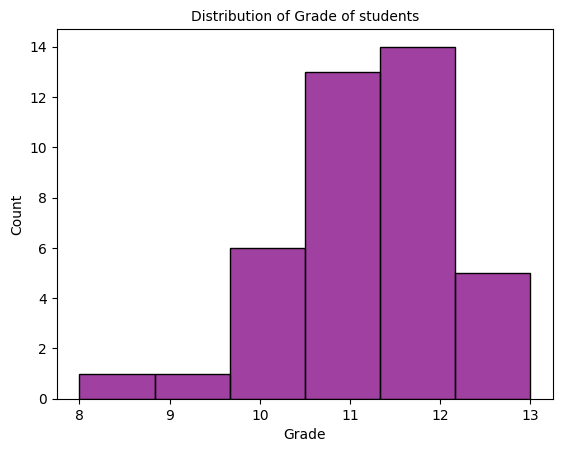

In [67]:
a = sns.histplot(ddf_test['G1'], bins = 6, color = 'purple')
a.axes.set_title('Distribution of Grade of students', fontsize = 10)
a.set_xlabel('Grade', fontsize = 10)
a.set_ylabel('Count', fontsize = 10)
plt.show()